In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model as lm
bicon = pd.read_csv('datasets/bioCON_plant_diversity.txt', delimiter='\t')
species = pd.read_csv('datasets/species.txt', delimiter='\t')

# Data sampling and collection

# Data cleaning

In [2]:
bicon

,Year,Plot,Ring,CO2 Treatment,Nitrogen Treatment,CountOfSpecies,CountOfGroup,Experiment,monospecies,Monogroup,Water Treatment,Temp Treatment,Depth,Carbon(%),Nitrogen(%),C/N Ratio
0,2002,1,1,Cenrich,Namb,4,2,M,,,,,0-10,0.618,0.074,8.351351351
1,2002,1,1,Cenrich,Namb,4,2,M,,,,,10-20,0.515,0.057,9.035087719
2,2002,1,1,Cenrich,Namb,4,2,M,,,,,20-40,0.142,0.023,6.173913043
3,2002,1,1,Cenrich,Namb,4,2,M,,,,,40-60,0.132,0.016,8.25
4,2002,2,1,Cenrich,Namb,1,1,M,Bouteloua gracilis,C-4,,,0-10,0.55,0.07,7.857142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,2016,365,6,Camb,Nenrich,4,2,M,,,,,40-60,0.329,0.027,12.18518519
5629,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,0-10,0.85,0.066,12.87878788
5630,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,10-20,0.57,0.05,11.4
5631,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,20-40,0.454,0.036,12.61111111


In [3]:
bicon['monospecies'].unique()

array([' ', 'Bouteloua gracilis', 'Asclepias tuberosa',
       'Schizachyrium scoparium', 'Amorpha canescens', 'Bromus inermis',
       'Agropyron repens', 'Lespedeza capitata', 'Petalostemum villosum',
       'Poa pratensis', 'Solidago rigida', 'Anemone cylindrica',
       'Koeleria cristata', 'Achillea millefolium', 'Lupinus perennis',
       'Andropogon gerardi', 'Sorghastrum nutans'], dtype=object)

In [4]:
bicon['Carbon(%)'].replace('', np.nan, inplace=True)
bicon['Nitrogen(%)'].replace('', np.nan, inplace=True)
bicon['C/N Ratio'].replace(' ', np.nan, inplace=True)
bicon.dropna(subset=['Carbon(%)', 'Nitrogen(%)', 'C/N Ratio'], inplace=True)
bicon['Carbon(%)'] = bicon['Carbon(%)'].astype(float)
bicon['Nitrogen(%)'] = bicon['Nitrogen(%)'].astype(float)
bicon['C/N Ratio'] = bicon['C/N Ratio'].astype(float)

# Exploratory data analysis

<AxesSubplot: xlabel='CountOfSpecies'>

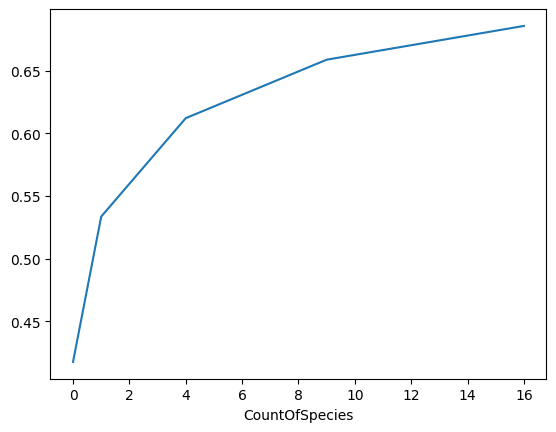

In [5]:
bicon.groupby(['CountOfSpecies'])['Carbon(%)'].mean().plot()

<AxesSubplot: xlabel='CountOfSpecies'>

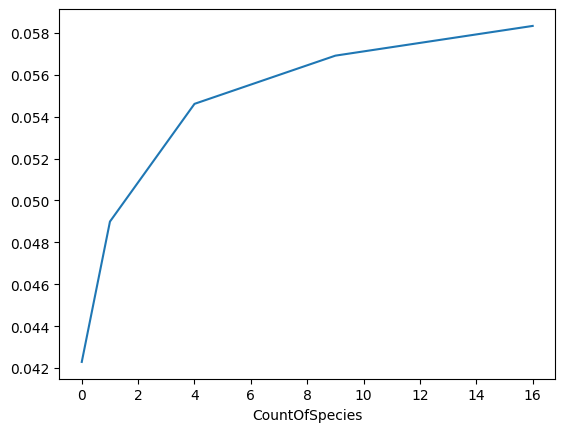

In [6]:
bicon.groupby(['CountOfSpecies'])['Nitrogen(%)'].mean().plot()

In [7]:
bicon[(bicon['Temp Treatment'] == 'HTelv') | (bicon['Temp Treatment'] == 'HTamb')]['Carbon(%)'].mean()

0.6662741514360313

In [8]:
bicon.groupby('Year').mean()

/var/folders/rp/0n508lmj72ldc75gvssc3p200000gn/T/ipykernel_18381/3005142552.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bicon.groupby('Year').mean()


,Plot,CountOfSpecies,CountOfGroup,Carbon(%),Nitrogen(%),C/N Ratio
Year,,,,,,
2002,186.111336,5.192308,2.269231,0.555184,0.056675,9.873872
2007,186.000000,5.196765,2.269542,0.644554,0.056111,11.191059
2012,185.896831,5.199595,2.270398,0.619814,0.054675,11.216634
2016,183.597956,5.695060,2.469336,0.559779,0.043070,13.676147


<AxesSubplot: xlabel='Nitrogen Treatment', ylabel='Nitrogen(%)'>

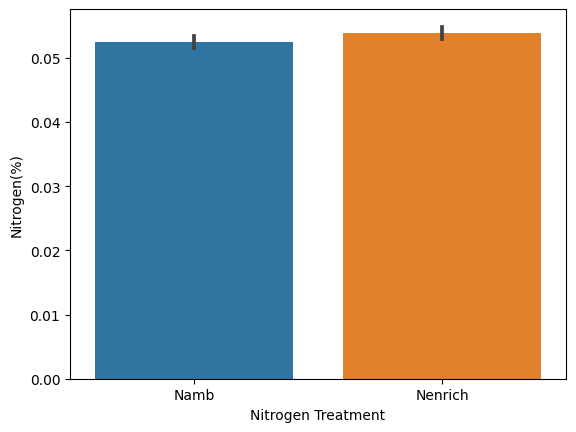

In [9]:
#sns.lmplot(x = "Nitrogen(%)", y = "Carbon(%)", data = bicon, hue = "Nitrogen Treatment", scatter_kws={"s": 1})
sns.barplot(data = bicon, x="Nitrogen Treatment", y='Nitrogen(%)' )

<AxesSubplot: xlabel='CO2 Treatment', ylabel='Carbon(%)'>

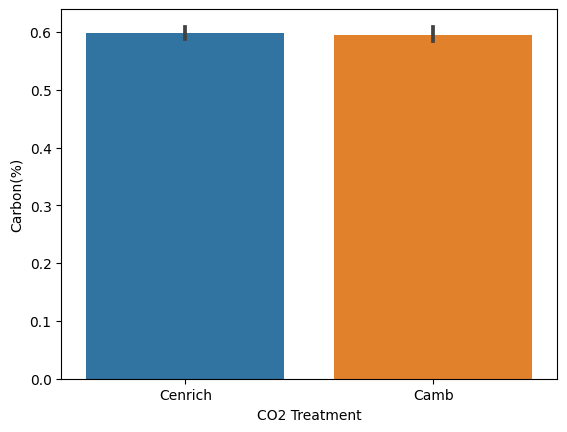

In [10]:
sns.barplot(data = bicon, x="CO2 Treatment", y='Carbon(%)' )

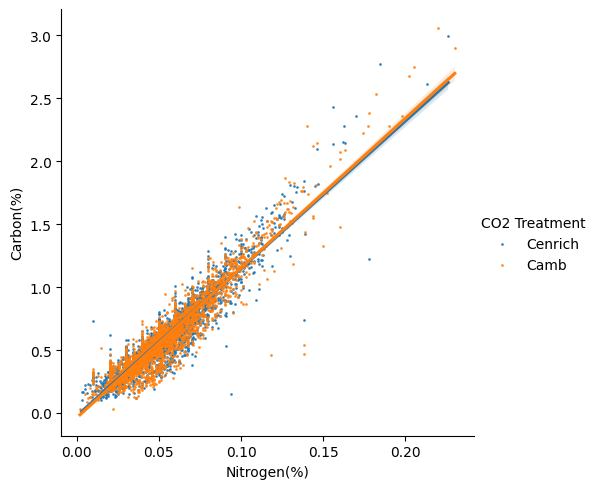

In [11]:
sns.lmplot(x = "Nitrogen(%)", y = "Carbon(%)", data = bicon, hue = "CO2 Treatment", scatter_kws={"s": 1})

In [12]:
bicon.groupby(['Ring'])['Carbon(%)', 'Nitrogen(%)', 'CountOfSpecies'].mean()

/var/folders/rp/0n508lmj72ldc75gvssc3p200000gn/T/ipykernel_18381/2100562172.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bicon.groupby(['Ring'])['Carbon(%)', 'Nitrogen(%)', 'CountOfSpecies'].mean()


,Carbon(%),Nitrogen(%),CountOfSpecies
Ring,,,
,0.590000,0.040000,1.000000
1,0.497032,0.045250,5.328649
2,0.496112,0.044348,5.321238
3,0.673258,0.059639,5.254777
4,0.594512,0.053232,5.327641
5,0.622654,0.054147,5.329018
6,0.693917,0.062060,5.247379


**Temperature Treatment**

In the BioCON research experiment, 48 of the plots in the study recieved a temperature treatment of 2 deegrees C meant to represent the minimum warming predictedver the next century for Central North America. Therefore, we wanted to check if this treatment had any correlation with the amount of Carbon and Nitrogen in the soil for each plot. All of the 48 plots which recieved the treatment all had the diversity of 9 different species. In order to see if the treatment had any significant effect, we compared the overall mean for the plots affected by temperature treatment with the plot not affected, and found little reason to belive this has a impact.

In [13]:
bicon[bicon['CountOfSpecies'] == 9].groupby('Temp Treatment')['Carbon(%)', 'Nitrogen(%)'].mean()

/var/folders/rp/0n508lmj72ldc75gvssc3p200000gn/T/ipykernel_18381/3525437993.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bicon[bicon['CountOfSpecies'] == 9].groupby('Temp Treatment')['Carbon(%)', 'Nitrogen(%)'].mean()


,Carbon(%),Nitrogen(%)
Temp Treatment,,
,0.654009,0.058860
HTamb,0.664361,0.054079
HTelv,0.668177,0.053880


In [14]:
bicon.groupby('Year')['Carbon(%)', 'Nitrogen(%)'].mean()

/var/folders/rp/0n508lmj72ldc75gvssc3p200000gn/T/ipykernel_18381/1560371318.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bicon.groupby('Year')['Carbon(%)', 'Nitrogen(%)'].mean()


,Carbon(%),Nitrogen(%)
Year,,
2002,0.555184,0.056675
2007,0.644554,0.056111
2012,0.619814,0.054675
2016,0.559779,0.043070


In [15]:
total = pd.merge(bicon, species, on='Plot')
total = total.drop(columns = ['Ring_x','CO2 Treatment', 'Nitrogen Treatment', 'Experiment', 'monospecies',
                              'Monogroup', 'Water Treatment', 'Temp Treatment', 'CountOfGroup', 'Ring_y', 'C/N Ratio', 'Year', 'Depth'])
#total['Depth'].replace(['0-10','10-20','20-40', '40-60'], [5,15,30,50], inplace=True)
total

,Plot,CountOfSpecies,Carbon(%),Nitrogen(%),Achillea millefolium,Agropyron repens,Amorpha canescens,Andropogon gerardi,Anemone cylindrica,Asclepias tuberosa,Bouteloua gracilis,Bromus inermis,Koeleria cristata,Lespedeza capitata,Lupinus perennis,Petalostemum villosum,Poa pratensis,Schizachyrium scoparium,Solidago rigida,Sorghastrum nutans
0,1,4,0.618,0.074,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,1,4,0.515,0.057,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,1,4,0.142,0.023,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,1,4,0.132,0.016,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4,1,4,1.000,0.077,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,371,0,0.262,0.028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5619,371,0,0.490,0.047,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5620,371,0,0.809,0.066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5621,371,0,0.405,0.037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
total.dtypes

Plot                         int64
CountOfSpecies               int64
Carbon(%)                  float64
Nitrogen(%)                float64
Achillea millefolium         int64
Agropyron repens             int64
Amorpha canescens            int64
Andropogon gerardi           int64
Anemone cylindrica           int64
Asclepias tuberosa           int64
Bouteloua gracilis           int64
Bromus inermis               int64
Koeleria cristata            int64
Lespedeza capitata           int64
Lupinus perennis             int64
Petalostemum villosum        int64
Poa pratensis                int64
Schizachyrium scoparium      int64
Solidago rigida              int64
Sorghastrum nutans           int64
dtype: object

# Data modeling and inferences

In [17]:
bicon

,Year,Plot,Ring,CO2 Treatment,Nitrogen Treatment,CountOfSpecies,CountOfGroup,Experiment,monospecies,Monogroup,Water Treatment,Temp Treatment,Depth,Carbon(%),Nitrogen(%),C/N Ratio
0,2002,1,1,Cenrich,Namb,4,2,M,,,,,0-10,0.618,0.074,8.351351
1,2002,1,1,Cenrich,Namb,4,2,M,,,,,10-20,0.515,0.057,9.035088
2,2002,1,1,Cenrich,Namb,4,2,M,,,,,20-40,0.142,0.023,6.173913
3,2002,1,1,Cenrich,Namb,4,2,M,,,,,40-60,0.132,0.016,8.250000
4,2002,2,1,Cenrich,Namb,1,1,M,Bouteloua gracilis,C-4,,,0-10,0.550,0.070,7.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5628,2016,365,6,Camb,Nenrich,4,2,M,,,,,40-60,0.329,0.027,12.185185
5629,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,0-10,0.850,0.066,12.878788
5630,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,10-20,0.570,0.050,11.400000
5631,2016,366,6,Camb,Nenrich,1,1,M,Achillea millefolium,Forb,,,20-40,0.454,0.036,12.611111


In [18]:
np.random.seed(1337)

def train_test_split(data):
    lenght = data.shape[0]
    shuffled_indices = np.random.permutation(lenght)
    
    train_indices = np.array(shuffled_indices[:int(lenght*0.8)])
    test_indices = np.array(shuffled_indices[int(lenght*0.8):])
    train = data.iloc[train_indices]
    test = data.iloc[test_indices]
    return train, test
    
train, test = train_test_split(total)

Xtrain = train.drop(columns=['Carbon(%)']).to_numpy()
ytrain = train.loc[:, 'Carbon(%)'].to_numpy()

Xtest = test.drop(columns=['Carbon(%)']).to_numpy()
ytest = test.loc[:, 'Carbon(%)'].to_numpy()


linear_model = lm.LinearRegression(fit_intercept=True)
type(ytrain[0])

numpy.float64

In [19]:
# Fit the 1st model
# Compute the fitted and predicted values of Log Sale Price for 1st model
linear_model.fit(Xtrain, ytrain)
y_fitted = linear_model.predict(Xtrain)
y_predicted = linear_model.predict(Xtest)

In [20]:
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

In [21]:
# Training and test errors for the 1st model
training_error_m1 = rmse(y_fitted, ytrain)
test_error_m1 = rmse(y_predicted, ytest)

print("1st Model\nTraining RMSE: {}\nTest RMSE: {}\n".format(training_error_m1, test_error_m1))

1st Model
Training RMSE: 0.10868387024614731
Test RMSE: 0.09531812477871067



In [22]:
train

,Plot,CountOfSpecies,Carbon(%),Nitrogen(%),Achillea millefolium,Agropyron repens,Amorpha canescens,Andropogon gerardi,Anemone cylindrica,Asclepias tuberosa,Bouteloua gracilis,Bromus inermis,Koeleria cristata,Lespedeza capitata,Lupinus perennis,Petalostemum villosum,Poa pratensis,Schizachyrium scoparium,Solidago rigida,Sorghastrum nutans
3372,223,1,0.5713,0.0532,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
610,41,4,0.5450,0.0520,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0
5385,355,16,0.7124,0.0665,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011,133,9,0.6530,0.0520,1,0,0,0,0,0,1,1,1,0,0,1,1,1,1,1
2258,149,9,0.6030,0.0660,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,236,16,0.9549,0.0784,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3582,236,16,1.2620,0.1010,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1279,85,4,0.5230,0.0450,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1735,115,1,0.6650,0.0510,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
test

,Plot,CountOfSpecies,Carbon(%),Nitrogen(%),Achillea millefolium,Agropyron repens,Amorpha canescens,Andropogon gerardi,Anemone cylindrica,Asclepias tuberosa,Bouteloua gracilis,Bromus inermis,Koeleria cristata,Lespedeza capitata,Lupinus perennis,Petalostemum villosum,Poa pratensis,Schizachyrium scoparium,Solidago rigida,Sorghastrum nutans
81,6,4,0.583,0.043,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
4566,301,16,1.288,0.094,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3959,261,1,0.506,0.068,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2063,136,4,0.565,0.047,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3432,227,1,0.512,0.060,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,213,16,0.870,0.060,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1256,84,9,0.536,0.053,0,0,1,1,0,1,1,0,0,1,1,1,1,1,0,0
860,57,1,0.475,0.042,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
189,13,16,1.192,0.101,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
